<a href="https://colab.research.google.com/github/holman57/Business-Intelligence-Dashboard/blob/main/examples/Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly Examples

- https://www.educative.io/courses/interactive-dashboards-and-data-apps-with-plotly-and-dash/data-and-layout-attributes

In [1]:
!pip uninstall plotly -y

Found existing installation: plotly 5.15.0
Uninstalling plotly-5.15.0:
  Successfully uninstalled plotly-5.15.0


In [2]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.9 MB/s eta 0:00:00


In [3]:
!pip show plotly

Name: plotly
Version: 5.22.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, tenacity
Required-by: cufflinks, datascience, geemap


In [4]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

## Add Line to Plot

In [5]:
fig = go.Figure()
fig.add_scatter(x=[1, 2, 3], y=[4, 2, 3])
fig.show()

## Add Multiple Lines Per-Plot

In [6]:
fig = go.Figure()
fig.add_scatter(x=[1, 2, 3], y=[4, 2, 3])
fig.add_scatter(x=[1, 2, 3, 4], y=[4, 5, 2, 3])
fig.show()

## Some of the Figure object's layout.xaxis options

* tickfont
* tickformat
* tickformatstopdefaults
* tickformatstops
* ticklabelmode
* ticklen
* tickmode
* tickprefix
* ticks
* tickson


In [7]:
fig = go.Figure()
fig.add_scatter(x=[1, 2, 3], y=[4, 2, 3])
fig.add_scatter(x=[1, 2, 3, 4], y=[4, 5, 2, 3])
fig.layout.title = 'The Figure Title'
fig.layout.xaxis.title = 'The X-axis title'
fig.layout.yaxis.title = 'The Y-axis title'
fig.show()

## Interactively exploring the Figure object

In [8]:
fig.show('json')

In [9]:
fig.show(config={'displaylogo': False,
                'modeBarButtonsToAdd': ['drawrect',
                                        'drawcircle',
                                        'eraseshape']})

* `displayModeBar`: This defaults to `True`. It controls whether or not to display the whole mode bar.

* `responsive`: This defaults to `True`. It controls whether or not to change the dimensions of the figure based on the browser window’s size. Sometimes, we might want to keep the figure dimensions fixed.

* `toImageButtonOptions`: The camera icon in the mode bar allows users to download the figure as an image. This option controls the default formats of downloading those images. It takes a dictionary in which we can set the default format (that is, SVG, PNG, JPG, or WebP). We can also set default values for the height, width, file name, and scale.

* `modeBarButtonsToRemove`: This is a list of buttons we don’t want in the mode bar.

In [10]:
fig.write_html('html_plot.html',
   config={'toImageButtonOptions':
      {'format': 'svg'}})

In [11]:
!ls -l html_plot.html

-rw-r--r-- 1 root root 3640336 May 25 04:20 html_plot.html


In [12]:
# !pip install -U kaleido
# fig.write_image('image_file.svg', height=600, width=850)

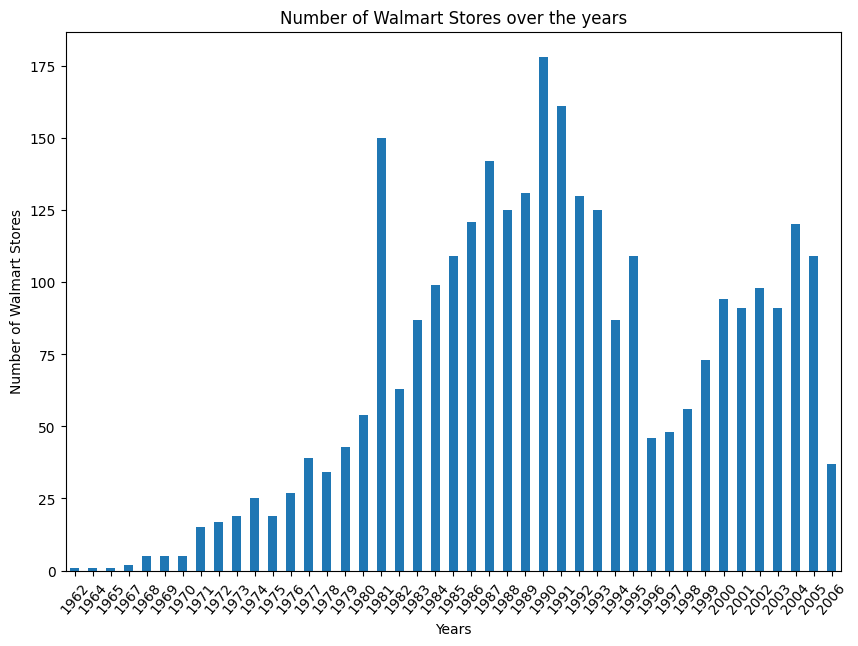

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
plt.figure(figsize=(10, 7))
fig = df['YEAR'].value_counts().sort_index().plot(kind='bar').figure
plt.xlabel("Years")
plt.xticks(rotation=50, horizontalalignment="center")
plt.title("Number of Walmart Stores over the years")
plt.ylabel("Number of Walmart Stores")
plt.show()
fig.savefig('walmart.png')
plt.close(fig)

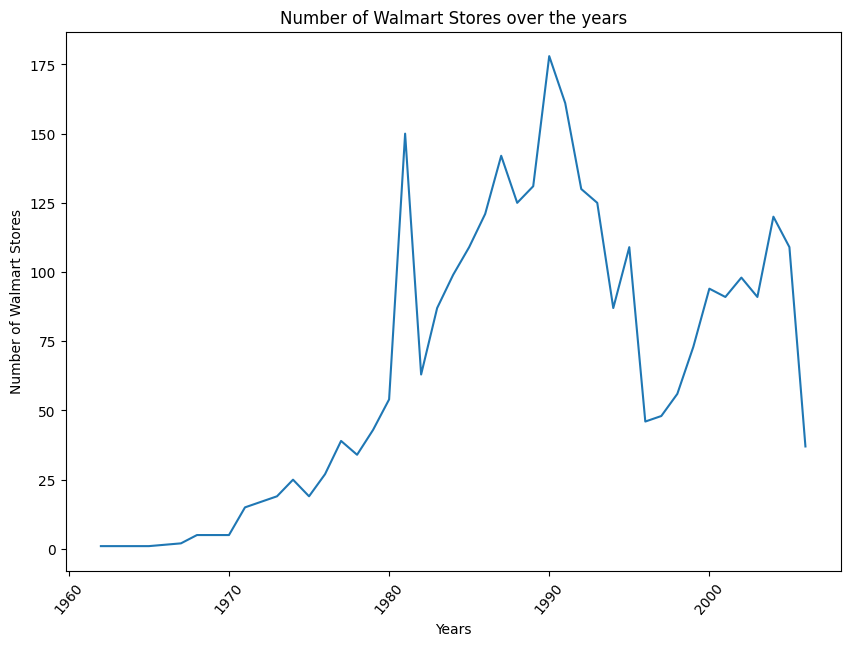

In [14]:
plt.figure(figsize=(10, 7))
fig = df['YEAR'].value_counts().sort_index().plot.line().figure
plt.xlabel("Years")
plt.xticks(rotation=50, horizontalalignment="center")
plt.title("Number of Walmart Stores over the years")
plt.ylabel("Number of Walmart Stores")
plt.show()
fig.savefig('walmart2.png')
plt.close(fig)

In [15]:
gapminder = px.data.gapminder()
px.scatter(data_frame=gapminder,
          x='gdpPercap',
          y='lifeExp',
          size='pop',
          facet_col='continent',
          color='continent',
          title='Life Expectancy and GDP per capita. 1952 - 2007',
          labels={'gdpPercap': 'GDP per Capita',
                  'lifeExp': 'Life Expectancy'},
          log_x=True,
          range_y=[20, 100],
          hover_name='country',
          animation_frame='year',
          height=600,
          size_max=90)

In [16]:
!ls -l

total 3640
-rw-r--r-- 1 root root 3640336 May 25 04:20 html_plot.html
drwxr-xr-x 1 root root    4096 May 23 13:25 sample_data
-rw-r--r-- 1 root root   48780 May 25 04:20 walmart2.png
-rw-r--r-- 1 root root   32632 May 25 04:20 walmart.png
